In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle

In [20]:
cluster_5 = pd.read_pickle('../clusters/hierachical_cluster_5.pkl')
cluster_5 = cluster_5.reset_index()

In [26]:
master_list_school = pd.read_csv('../Masterlist of Schools.csv')
master_list_school

merged_data = pd.merge(cluster_5, master_list_school, left_on='index', right_on='school.id')
merged_data.columns

Index(['index', 'ST Ratio', 'Students per Room Ratio',
       'MOOE per Student Ratio', 'Cluster_Labels', 'school.id', 'school.name',
       'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban'],
      dtype='object')

In [27]:
province_dic = {'CITY OF COTABATO':'Maguindanao',
 'Manila, Ncr, First District':"Metropolitan Manila",
 'Ncr Fourth District':"Metropolitan Manila",
 'Ncr Second District':"Metropolitan Manila",
 'Ncr Third District':"Metropolitan Manila",
 'Western Sama':"Samar"}

merged_data["school.province"] = merged_data["school.province"].str.title().replace(province_dic).str.replace("Del", 'del')
merged_data.head()

,index,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,Cluster_Labels,school.id,school.name,school.region,school.region.name,school.province,...,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban
0,100001,45.000000,0.022222,933.333333,0,100001,Apaleng-Libtong ES,Region I,Ilocos Region,Ilocos Norte,...,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban
1,100002,26.823529,0.026316,587.719298,0,100002,Bacarra CES,Region I,Ilocos Region,Ilocos Norte,...,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
2,100003,23.857143,0.035928,808.383234,0,100003,Buyon ES,Region I,Ilocos Region,Ilocos Norte,...,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
3,100004,17.428571,0.049180,950.819672,0,100004,Ganagan ES,Region I,Ilocos Region,Ilocos Norte,...,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban
4,100006,18.714286,0.053435,961.832061,0,100006,Nambaran ES,Region I,Ilocos Region,Ilocos Norte,...,100006.0,-,1/1/1953,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban


In [37]:
province_data = merged_data.groupby("school.province")["ST Ratio", "Students per Room Ratio", "MOOE per Student Ratio"].mean().reset_index()
province_data

<ipython-input-37-e879754dd785>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  province_data = merged_data.groupby("school.province")["ST Ratio", "Students per Room Ratio", "MOOE per Student Ratio"].mean().reset_index()


,school.province,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
0,Abra,26.229953,0.040515,860.920667
1,Agusan del Norte,42.280937,0.023182,599.103164
2,Agusan del Sur,42.821593,0.022509,640.299558
3,Aklan,33.892097,0.030286,691.732828
4,Albay,37.261625,0.029099,636.523119
...,...,...,...,...
73,Western Samar,40.300621,0.027937,784.141767
74,Zambales,37.188864,0.030705,640.252951
75,Zamboanga Sibugay,39.809398,0.032632,666.706335
76,Zamboanga del Norte,36.078857,0.028107,692.266954


In [32]:
shapefile = gpd.read_file('../PH Provinces Shapefile/Provinces.shp')
shapefile.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949..."
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509..."
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211..."
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [38]:
merged_data_2 = pd.merge(shapefile, province_data, left_on="PROVINCE", right_on="school.province") 
merged_data_2

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,school.province,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",Abra,26.229953,0.040515,860.920667
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",Agusan del Norte,42.280937,0.023182,599.103164
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",Agusan del Sur,42.821593,0.022509,640.299558
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",Aklan,33.892097,0.030286,691.732828
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",Albay,37.261625,0.029099,636.523119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,177,PHL,Philippines,77,Tarlac,None,None,Lalawigan|Probinsya,Province,Tarlac,Central Luzon (Region III),"POLYGON ((120.63007 15.73335, 120.63052 15.729...",Tarlac,37.787395,0.027599,631.356059
71,177,PHL,Philippines,79,Zambales,None,None,Lalawigan|Probinsya,Province,Zambales,Central Luzon (Region III),"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ...",Zambales,37.188864,0.030705,640.252951
72,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7...",Zamboanga del Norte,36.078857,0.028107,692.266954
73,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",Zamboanga del Sur,39.133146,0.029748,681.902009


In [39]:
merged_data_2.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'PROVINCE', 'REGION', 'geometry',
       'school.province', 'ST Ratio', 'Students per Room Ratio',
       'MOOE per Student Ratio'],
      dtype='object')

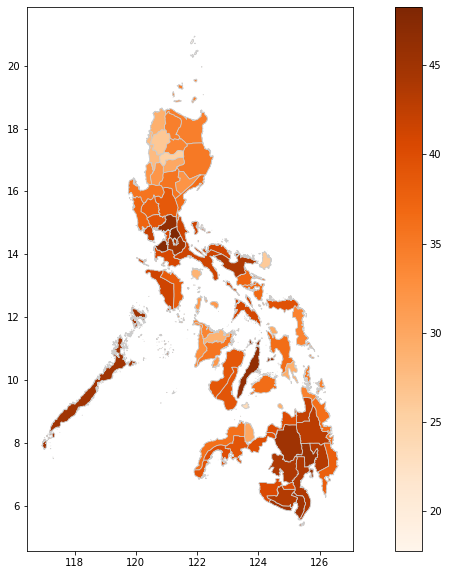

In [40]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'ST Ratio'
# set the range for the choropleth
vmin, vmax = merged_data_2["ST Ratio"].min(), merged_data_2["ST Ratio"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data_2.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

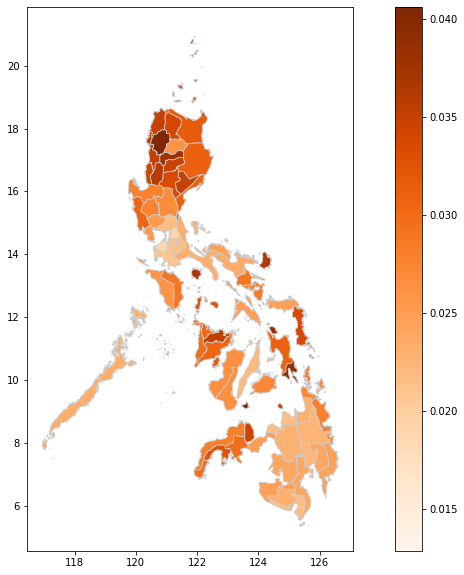

In [41]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Students per Room Ratio'
# set the range for the choropleth
vmin, vmax = merged_data_2["Students per Room Ratio"].min(), merged_data_2["Students per Room Ratio"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data_2.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

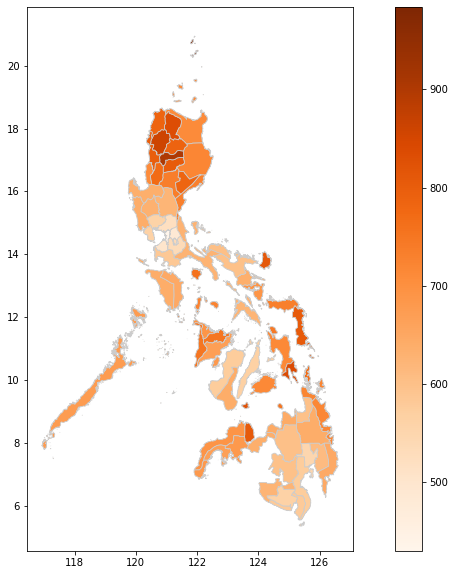

In [42]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'MOOE per Student Ratio'
# set the range for the choropleth
vmin, vmax = merged_data_2["MOOE per Student Ratio"].min(), merged_data_2["MOOE per Student Ratio"].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data_2.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)